In [12]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [13]:
!wget -q 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/University_of_Virginia_Rotunda_in_2006.jpg/1920px-University_of_Virginia_Rotunda_in_2006.jpg'

In [14]:
# Load the image into a numpy array
M = np.asarray(Image.open('1920px-University_of_Virginia_Rotunda_in_2006.jpg'))

print(M.shape)

(1440, 1920, 3)


In [5]:
M = M[:,:,1]
print(M.shape)

(1440, 1920)


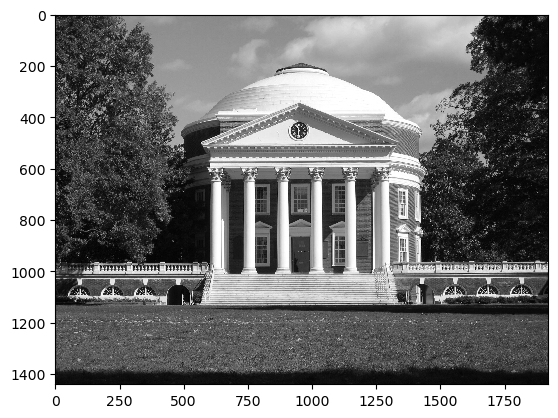

In [6]:
def plot_matrix(M):
  plt.imshow(M, interpolation='none', cmap='gray')
  plt.show()

# Plot the original image for comparison later
plot_matrix(M)

In [7]:
def svd_approx_channel(M, n):
  # Compute the singular value decomposition of M (https://en.wikipedia.org/wiki/Singular_value_decomposition)
  U, S, Vh = np.linalg.svd(M)

  # Discard all but the n largest singular values for approximation
  S_approx = np.zeros(M.shape)
  np.fill_diagonal(S_approx[:n], S[:n])

  return U @ S_approx @ Vh

In [8]:
U, S, Vh = np.linalg.svd(M)

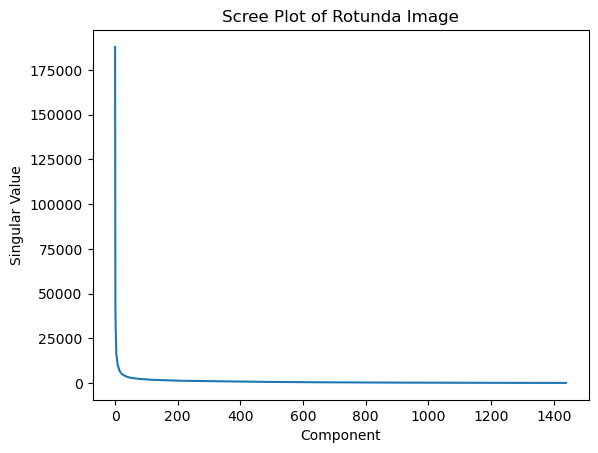

In [9]:
plt.plot(range(len(S)), S)

plt.title('Scree Plot of Rotunda Image')

plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.show()

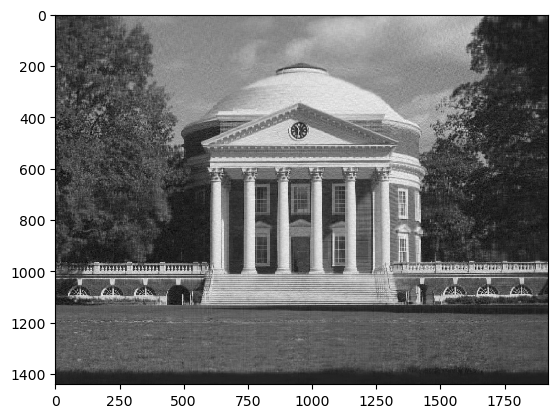

In [10]:
# Plot the approximation to compare to the original
plot_matrix(svd_approx_channel(M, 100))

Thanks to the informative answers here: https://math.stackexchange.com/questions/92171/what-do-eigenvalues-have-to-do-with-pictures/

In [15]:
R = M[:,:,0]
G = M[:,:,1]
B = M[:,:,2]

R_approx = svd_approx_channel(R, 70)
G_approx = svd_approx_channel(G, 70)
B_approx = svd_approx_channel(B, 70)

In [16]:
M_approx = np.array([R_approx, G_approx, B_approx])
M_approx = np.transpose(M_approx, (1, 2, 0))

# M_approx = (M_approx) / np.max(M_approx)
M_approx = (np.rint(M_approx)).astype(int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


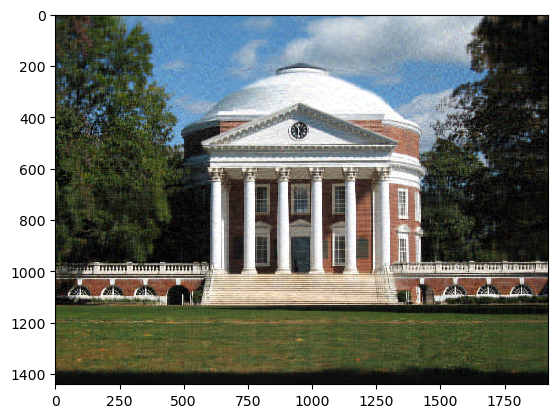

In [17]:
plot_matrix(M_approx)